In [83]:
# Importing modules and libraries
import pandas as pd
import numpy as np
import zipfile
import io
import os
import matplotlib.pyplot as plt


In [84]:
def extract_csv_data(zip_file):
    csv_data = []

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.endswith('.csv'):
                with zip_ref.open(file_info.filename) as csv_file:
                    csv_data.append(pd.read_csv(io.TextIOWrapper(csv_file, encoding='utf-8')))
    if len(csv_data) > 1:
        return pd.concat(csv_data, ignore_index=True)
    else:
        return csv_data[0]  

# Extract all csv content into pandas
def data_import(folder_path):
    dfs = []
    files = os.listdir(folder_path)
    zip_files = [file for file in files if file.endswith('.zip') ]
    num_files = len(zip_files)
    for i, zip_file in enumerate(zip_files):
        print(i + 1, '/', num_files)
        zip_file_path = os.path.join(folder_path, zip_file)
        dfs.append(extract_csv_data(zip_file_path))
    if len(dfs) > 1:
        return pd.concat(dfs, ignore_index=True)
    return dfs[0]




# Dataset 1 Overview

Source: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks

In [95]:
df1 = data_import('Dataset\Dataset 1')
df1

1 / 1


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

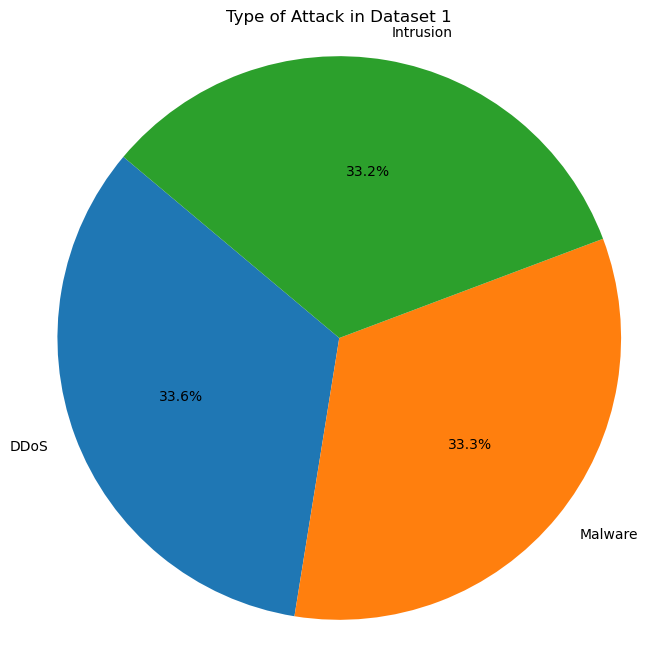

In [97]:
plt.figure(figsize=(8, 8))
plt.pie(df1['Attack Type'].value_counts(), labels=df1['Attack Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Type of Attack in Dataset 1')
plt.show()

# Dataset 2 Overview 

Source: https://www.unb.ca/cic/datasets/andmal2017.html

In [93]:
df2 = data_import('Dataset\Dataset 2')
df2 

1 / 7
2 / 7
3 / 7
4 / 7
5 / 7
6 / 7
7 / 7


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.0.238-10.42.0.211-443-54819-6,10.42.0.211,54819.0,172.217.0.238,443.0,6.0,14/06/2017 04:22:52,194.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
1,172.217.1.170-10.42.0.211-443-51023-6,10.42.0.211,51023.0,172.217.1.170,443.0,6.0,14/06/2017 04:22:52,5.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
2,172.217.2.110-10.42.0.211-443-39805-6,10.42.0.211,39805.0,172.217.2.110,443.0,6.0,14/06/2017 04:22:58,199542.0,9.0,8.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
3,172.217.2.110-10.42.0.211-443-39805-6,10.42.0.211,39805.0,172.217.2.110,443.0,6.0,14/06/2017 04:22:58,254.0,2.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
4,172.217.0.238-10.42.0.211-443-36040-6,172.217.0.238,443.0,10.42.0.211,36040.0,6.0,14/06/2017 04:22:59,2164751.0,1.0,3.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_DOWGIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609146,10.42.0.1-10.42.0.42-53-13580-17,10.42.0.42,13580.0,10.42.0.1,53.0,17.0,18/08/2017 01:24:16,1862755.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_ZSONE
2609147,10.42.0.42-121.12.98.62-41884-80-6,10.42.0.42,41884.0,121.12.98.62,80.0,6.0,18/08/2017 01:28:20,9662.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_ZSONE
2609148,10.42.0.1-10.42.0.42-53-56409-17,10.42.0.42,56409.0,10.42.0.1,53.0,17.0,18/08/2017 01:24:33,1614.0,1.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_ZSONE
2609149,10.42.0.1-10.42.0.42-5351-39045-17,10.42.0.42,39045.0,10.42.0.1,5351.0,17.0,18/08/2017 01:48:18,1860653.0,4.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_ZSONE


In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609151 entries, 0 to 2609150
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

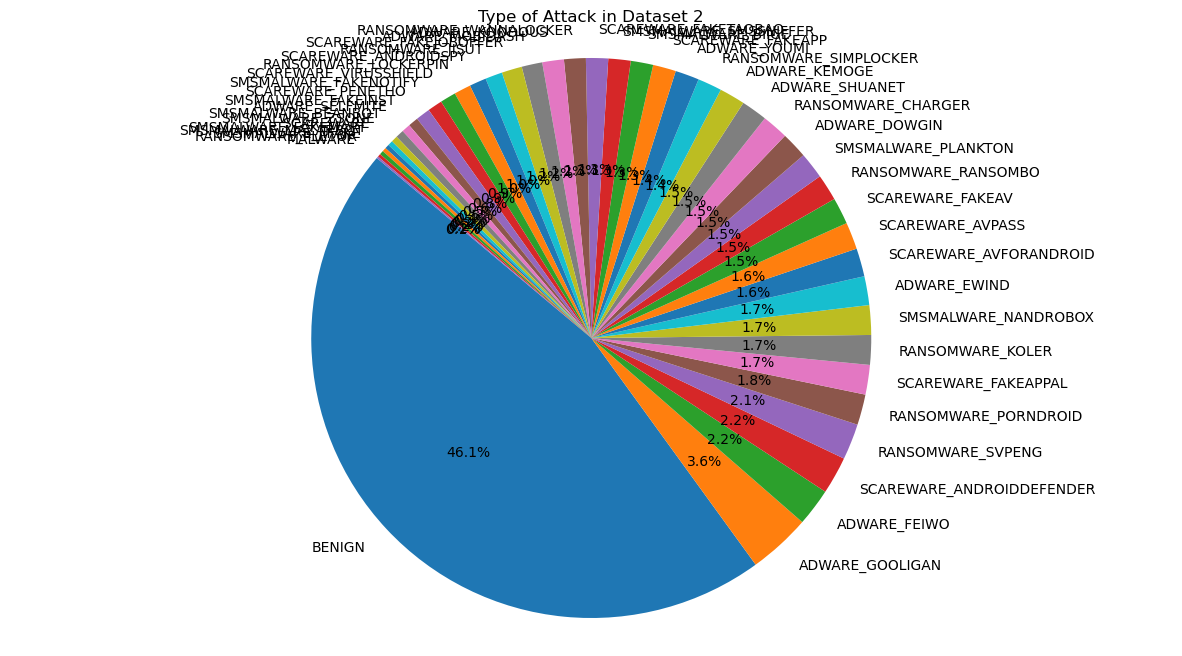

In [110]:
plt.figure(figsize=(15, 8))
plt.pie(df2[' Label'].value_counts(), labels=df2[' Label'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Type of Attack in Dataset 2')
plt.show()